# Imports and Load Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import shap

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Carrer 247/Data Sheet/telecom_churn.csv")
df.head()

,customer_id,gender,age,region_circle,connection_type,plan_type,contract_type,base_plan_category,tenure_months,monthly_charges,...,auto_pay_enrolled,late_payment_flag_3m,avg_payment_delay_days,arpu,segment_value,nps_score,service_rating_last_6m,received_competitor_offer_flag,retention_offer_accepted_flag,is_churn
0,100000,Female,23,West,4G,Postpaid,2 Year,Postpaid Platinum,84,1133.57,...,0,0,0.4,1133.57,High,13.0,3.2,0,0,0
1,100001,Male,72,West,4G,Prepaid,No Contract,Prepaid Unlimited,32,683.24,...,0,1,5.4,688.54,Medium,41.0,3.6,0,0,0
2,100002,Female,47,South,4G,Prepaid,No Contract,Prepaid Regular,119,307.04,...,1,0,0.0,307.05,Low,53.0,5.0,0,0,0
3,100003,Female,74,West,4G,Prepaid,No Contract,Prepaid Mini,73,213.82,...,1,0,0.0,214.89,Low,20.0,4.5,1,1,0
4,100004,Male,41,South,5G,Prepaid,No Contract,Prepaid Regular,92,383.17,...,0,0,0.5,383.99,Low,17.0,2.6,0,0,0


# Data Understanding & Cleaning

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     25000 non-null  int64  
 1   gender                          25000 non-null  object 
 2   age                             25000 non-null  int64  
 3   region_circle                   25000 non-null  object 
 4   connection_type                 25000 non-null  object 
 5   plan_type                       25000 non-null  object 
 6   contract_type                   25000 non-null  object 
 7   base_plan_category              25000 non-null  object 
 8   tenure_months                   25000 non-null  int64  
 9   monthly_charges                 25000 non-null  float64
 10  total_charges                   25000 non-null  float64
 11  avg_data_gb_month               25000 non-null  float64
 12  avg_voice_mins_month            

,customer_id,age,tenure_months,monthly_charges,total_charges,avg_data_gb_month,avg_voice_mins_month,sms_count_month,overage_charges,is_family_plan,...,selfcare_transactions_30d,auto_pay_enrolled,late_payment_flag_3m,avg_payment_delay_days,arpu,nps_score,service_rating_last_6m,received_competitor_offer_flag,retention_offer_accepted_flag,is_churn
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,112499.500000,45.960200,60.149600,475.518315,27230.695507,25.107675,602.187920,50.652920,55.209308,0.24872,...,1.993360,0.401440,0.200040,1.285748,477.978036,20.097920,3.789316,0.151400,0.100040,0.414280
std,7217.022701,16.401422,34.374772,267.550787,23717.163861,9.907997,247.929808,28.547638,43.627134,0.43228,...,1.418604,0.490199,0.400038,1.686236,267.818407,24.896257,0.672727,0.358446,0.300059,0.492607
min,100000.000000,18.000000,1.000000,99.000000,159.030000,0.500000,30.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,99.000000,-80.000000,1.000000,0.000000,0.000000,0.000000
25%,106249.750000,32.000000,31.000000,300.607500,10310.812500,18.390000,432.000000,30.000000,23.517500,0.00000,...,1.000000,0.000000,0.000000,0.200000,302.170000,3.000000,3.300000,0.000000,0.000000,0.000000
50%,112499.500000,46.000000,60.000000,385.735000,20840.650000,25.100000,603.000000,50.000000,50.790000,0.00000,...,2.000000,0.000000,0.000000,0.700000,387.870000,20.000000,3.800000,0.000000,0.000000,0.000000
75%,118749.250000,60.000000,90.000000,601.250000,36884.147500,31.820000,770.250000,70.000000,79.060000,0.00000,...,3.000000,1.000000,0.000000,1.500000,604.402500,37.000000,4.300000,0.000000,0.000000,1.000000
max,124999.000000,74.000000,119.000000,1603.490000,177878.030000,71.800000,1848.000000,173.000000,451.590000,1.00000,...,9.000000,1.000000,1.000000,11.000000,1603.490000,100.000000,5.000000,1.000000,1.000000,1.000000


In [4]:
df = df.drop(columns=["customer_id"])

In [5]:
df["is_churn"].value_counts(normalize=True)

,proportion
is_churn,
0,0.58572
1,0.41428


# EDA (Exploratory Data Analysis)

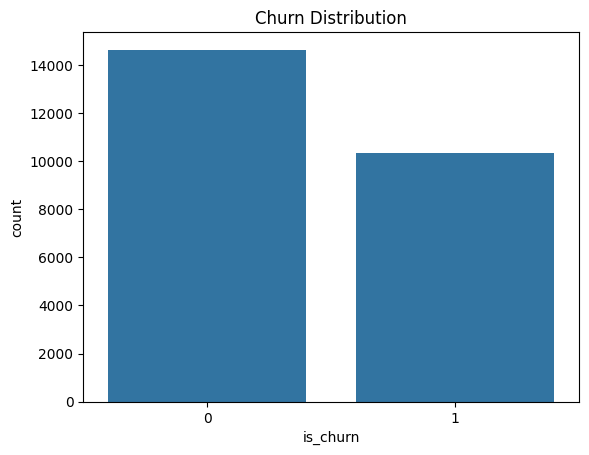

In [6]:
sns.countplot(x="is_churn", data=df)
plt.title("Churn Distribution")
plt.show()

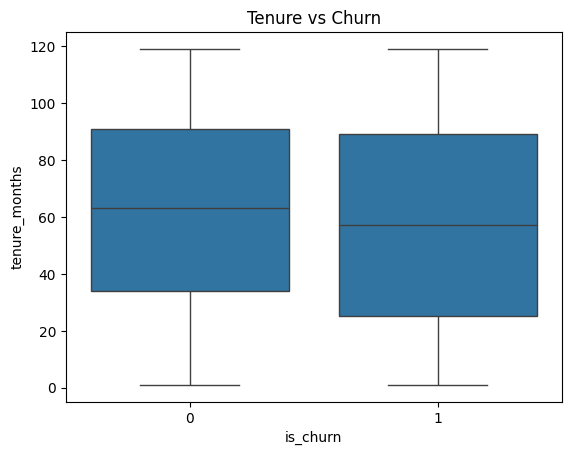

In [7]:
sns.boxplot(x="is_churn", y="tenure_months", data=df)
plt.title("Tenure vs Churn")
plt.show()

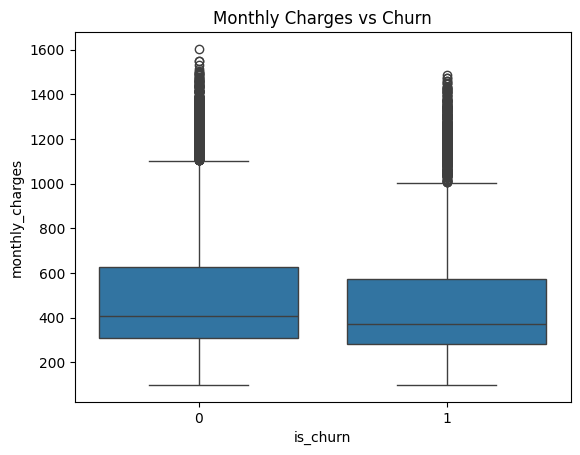

In [8]:
sns.boxplot(x="is_churn", y="monthly_charges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

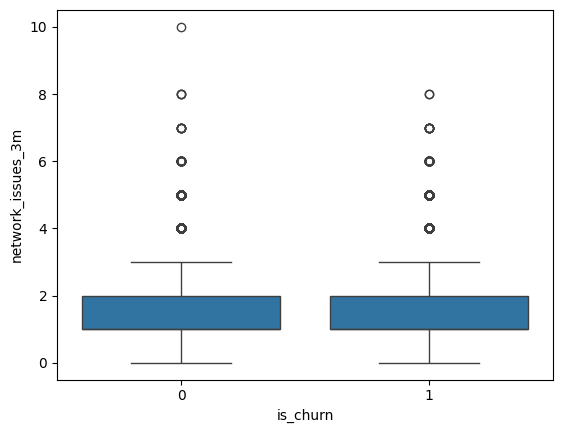

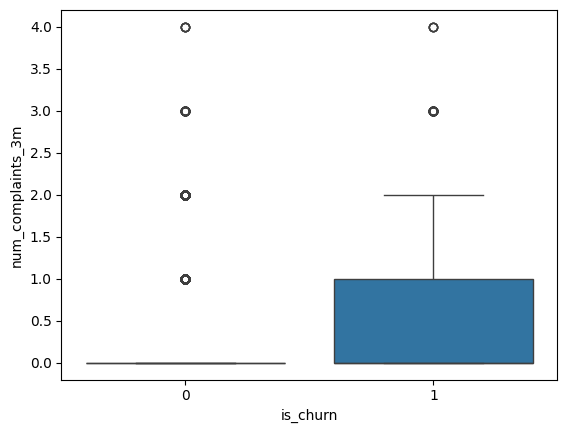

In [9]:
sns.boxplot(x="is_churn", y="network_issues_3m", data=df)
plt.show()

sns.boxplot(x="is_churn", y="num_complaints_3m", data=df)
plt.show()

# Feature Engineering

In [10]:
categorical_cols = [
    "gender",
    "region_circle",
    "connection_type",
    "plan_type",
    "contract_type",
    "base_plan_category",
    "segment_value"
]

numeric_cols = [
    "age",
    "tenure_months",
    "monthly_charges",
    "total_charges",
    "avg_data_gb_month",
    "avg_voice_mins_month",
    "sms_count_month",
    "overage_charges",
    "network_issues_3m",
    "dropped_call_rate",
    "avg_data_speed_mbps",
    "num_complaints_3m",
    "num_complaints_12m",
    "call_center_interactions_3m",
    "last_complaint_resolution_days",
    "app_logins_30d",
    "selfcare_transactions_30d",
    "avg_payment_delay_days",
    "arpu",
    "nps_score",
    "service_rating_last_6m"
]

binary_cols = [
    "is_family_plan",
    "is_multi_service",
    "auto_pay_enrolled",
    "late_payment_flag_3m",
    "received_competitor_offer_flag",
    "retention_offer_accepted_flag"
]


In [11]:
df_encoded = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)

In [12]:
X = df_encoded.drop("is_churn", axis=1)
y = df_encoded["is_churn"]

# Train-Test Split & Scaling

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

In [15]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1]))

              precision    recall  f1-score   support

           0       0.64      0.83      0.72      3661
           1       0.59      0.35      0.44      2589

    accuracy                           0.63      6250
   macro avg       0.62      0.59      0.58      6250
weighted avg       0.62      0.63      0.61      6250

ROC-AUC: 0.6503209584727434


In [16]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_leaf=50,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.64      0.84      0.73      3661
           1       0.60      0.34      0.43      2589

    accuracy                           0.63      6250
   macro avg       0.62      0.59      0.58      6250
weighted avg       0.63      0.63      0.61      6250

ROC-AUC: 0.6500197450415575


In [17]:
X_train.dtypes[X_train.dtypes == 'object']

,0


In [18]:
print(X_train.dtypes.value_counts())
problem_cols = X_train.columns[
    X_train.apply(lambda col: col.map(type).nunique() > 1)
]
print(problem_cols)

bool       19
int64      14
float64    13
Name: count, dtype: int64
Index([], dtype='object')


In [19]:
X_train_np = X_train.astype(float).values
X_test_np  = X_test.astype(float).values

# Model Explainability (SHAP)

100%|===================| 12494/12500 [13:55<00:00]       

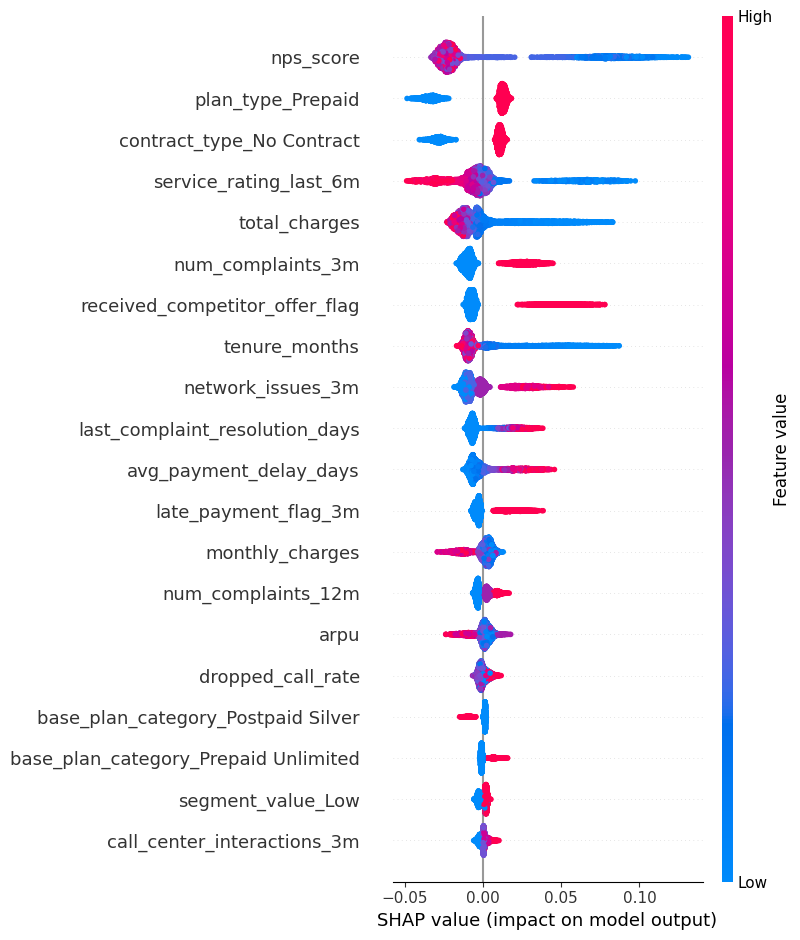

In [20]:
explainer = shap.Explainer(rf, X_train_np)
shap_values = explainer(X_test_np)

shap.summary_plot(
    shap_values[:, :, 1],
    X_test_np,
    feature_names=X_train.columns
)


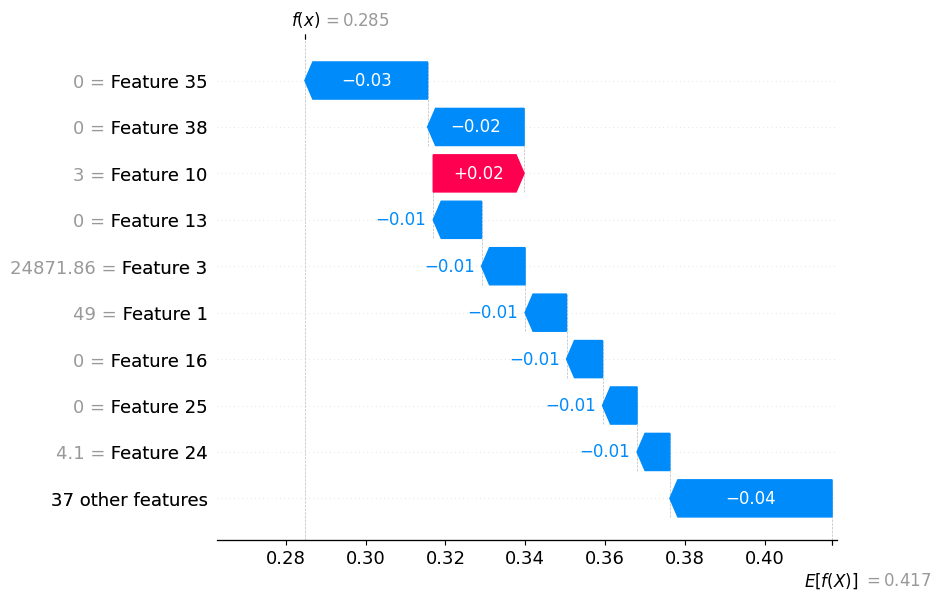

In [21]:
sample_idx = 5

shap.plots.waterfall(
    shap_values[sample_idx, :, 1],
    max_display=10
)

# Business Insights

In [22]:
# Why Customers Leave

# Main reasons customers churn:
 # High monthly bills
 # Short time with the company
 # Frequent network problems
 # Many complaints
 # Low satisfaction (NPS)
 # Better competitor offers
 # No auto-pay enabled

# Who Is Most at Risk

# Customers likely to churn:
 # New customers with high spending
 # Customers with poor network experience
 # Customers who complained multiple times recently
 # Customers with late payments

# How to Retain Them

# Recommended actions:
 # Offer discounts during the first 3–6 months
 # Reach out quickly after network issues
 # Give personalized offers before competitors do
 # Encourage auto-pay with incentives
 # Provide faster support for high-value customers

# Streamlit App

In [23]:
import joblib

joblib.dump(rf, "churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns.tolist(), "model_features.pkl")

print("Files saved successfully!")

Files saved successfully!


In [ ]:
!pip install streamlit
import streamlit as st

model = joblib.load("churn_model.pkl")
scaler = joblib.load("scaler.pkl")
features = joblib.load("model_features.pkl")

st.title("📡 Telecom Customer Churn Prediction")

tenure = st.slider("Tenure (Months)", 0, 72, 12)
monthly = st.slider("Monthly Charges", 100.0, 5000.0, 800.0)
network_issues = st.slider("Network Issues (Last 3 Months)", 0, 20, 2)
complaints = st.slider("Complaints (Last 3 Months)", 0, 10, 1)
nps = st.slider("NPS Score", -100.0, 100.0, 20.0)
auto_pay = st.selectbox("Auto Pay Enrolled", [0, 1])

input_dict = {col: 0 for col in features}

input_dict["tenure_months"] = tenure
input_dict["monthly_charges"] = monthly
input_dict["network_issues_3m"] = network_issues
input_dict["num_complaints_3m"] = complaints
input_dict["nps_score"] = nps
input_dict["auto_pay_enrolled"] = auto_pay

input_df = pd.DataFrame([input_dict])

input_scaled = scaler.transform(input_df)
pred = model.predict(input_df)[0]
prob = model.predict_proba(input_df)[0][1]

if st.button("Predict Churn"):
    if pred == 1:
        st.error(f"⚠️ High Churn Risk — Probability: {prob:.2%}")
    else:
        st.success(f"✅ Low Churn Risk — Probability: {prob:.2%}")


In [25]:
%%writefile app.py
import os

st.set_page_config(page_title="Telecom Churn", layout="centered")

# Safety check
required_files = ["churn_model.pkl", "scaler.pkl", "model_features.pkl"]
for f in required_files:
    if not os.path.exists(f):
        st.error(f"Missing file: {f}")
        st.stop()

model = joblib.load("churn_model.pkl")
scaler = joblib.load("scaler.pkl")
features = joblib.load("model_features.pkl")

st.title("📡 Telecom Customer Churn Prediction")

st.markdown("Predict whether a customer is likely to churn")

tenure = st.slider("Tenure (Months)", 0, 72, 12)
monthly = st.slider("Monthly Charges", 100.0, 5000.0, 800.0)
network_issues = st.slider("Network Issues (Last 3 Months)", 0, 20, 2)
complaints = st.slider("Complaints (Last 3 Months)", 0, 10, 1)
nps = st.slider("NPS Score", -100.0, 100.0, 20.0)
auto_pay = st.selectbox("Auto Pay Enrolled", [0, 1])

input_dict = {col: 0 for col in features}

input_dict["tenure_months"] = tenure
input_dict["monthly_charges"] = monthly
input_dict["network_issues_3m"] = network_issues
input_dict["num_complaints_3m"] = complaints
input_dict["nps_score"] = nps
input_dict["auto_pay_enrolled"] = auto_pay

input_df = pd.DataFrame([input_dict])

prediction = model.predict(input_df)[0]
probability = model.predict_proba(input_df)[0][1]

if st.button("Predict Churn"):
    if prediction == 1:
        st.error(f"⚠️ High Churn Risk — Probability: {probability:.2%}")
    else:
        st.success(f"✅ Low Churn Risk — Probability: {probability:.2%}")


Writing app.py
